In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Importing Packages

In [5]:
import sys
import numpy as np

import time
import sys
import warnings
import datetime
import gc
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import os
import seaborn as sns
from pathlib import Path
import statsmodels.api as sm


import plotly as pl


from sklearn.preprocessing import LabelEncoder, StandardScaler, Imputer, PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn import linear_model
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier, XGBClassifierBase
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score, balanced_accuracy_score
from sklearn.metrics import auc, average_precision_score, confusion_matrix, f1_score, fbeta_score, classification_report
from sklearn.metrics import log_loss, recall_score, roc_auc_score, roc_curve

from sklearn.linear_model import PassiveAggressiveClassifier, RandomizedLogisticRegression

from sklearn.model_selection import GridSearchCV


import data_prep 
import data_summary

#import evaluation_metric
import lime_ModelExplainer

import data_split
#import plot_residual
import reading_data
import eda

#from evaluation_metric import adjusted_R2score_calc #custom made
#from plot_residual import plot_residuals
from lime_ModelExplainer import lime_explainer
%matplotlib inline  

In [6]:
from imblearn.under_sampling import TomekLinks

from sklearn.decomposition import PCA


import imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import plotly

In [7]:
offline.init_notebook_mode(connected=True)

In [8]:
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, log_loss, recall_score, roc_curve, roc_auc_score, confusion_matrix,classification_report 
from sklearn.metrics import  adjusted_mutual_info_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score


In [9]:
project_identifier = "c360_customeradt_in_market_lexus"

In [10]:
parent_dir         = "/datascience/home/ssaha/"

parent_dir_project = os.path.join(parent_dir,'RMModel/') 
mlresult_dir       = os.path.join(parent_dir_project,'mlresults/')
mlobjects          =os.path.join(parent_dir_project,'mlobjects/')

data_dir           = os.path.join(parent_dir_project,'data/')
input_dir          = os.path.join(parent_dir_project,'input/')

### Appending path to import h2o

In [11]:
sys.path.append('/datascience/home/ssaha/')

In [12]:
import h2o

In [14]:
gc.collect()

0

# Reading data

In [15]:
df_2015= reading_data.read_data(path="/datascience/home/ssaha/input/c360_customeradt_in_market_lexus_082015/")


In [ ]:
df_2015_imputed= data_prep.missing_value_imputation(df_2015, 'mean')

Number of categorical features: 57
Number of numerical features: 543
Categorical column brand_relation is getting imputed by most frequent value- Lexus
Categorical column active_brand is getting imputed by most frequent value- Lexus
Categorical column association_type is getting imputed by most frequent value- Active
Categorical column state_residence is getting imputed by most frequent value- CA
Categorical column last_vehicle_model_year is getting imputed by most frequent value- 2015
Categorical column last_sales_dealer_no is getting imputed by most frequent value- 
Categorical column last_sales_dealer_markettype is getting imputed by most frequent value- Metro Point
Categorical column hh_income is getting imputed by most frequent value- E
Categorical column marital_status is getting imputed by most frequent value- M
Categorical column marital_status_confidence is getting imputed by most frequent value- 5
Categorical column i1_education_confidence is getting imputed by most frequent 

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.



In [ ]:
df_2016= reading_data.read_data(path="/datascience/home/ssaha/input/c360_customeradt_in_market_lexus_082016/")


In [ ]:
df= pd.concat([df_2015, ])

### Creating Dependent Column

In [13]:
#primary_key =  df_parquet["customer_id"]           # Primary Key column names, useful in 
y_2015 = df_2015["dep_purchase_lexus_new_luv_6mo"]  # service dependent variable 

## Overall summary


In [15]:
y_2016 = df_2016["dep_purchase_lexus_new_luv_6mo"] 

In [19]:
df_2015.shape

(4470977, 707)

In [ ]:
data_summary.get_overall_summary(df_2016)

In [ ]:
data_summary.get_missing_value_count(df_2016).head()

In [ ]:
data_summary.get_most_frequent_count(df_2016).head()

In [ ]:
data_summary.write_to_excel(df_2016)

# Preprocessing

### Remove zero varience

In [21]:
df_2016_removed_one=data_prep.remove_cols_with_one_unique_value(df_2016)


 Time taken to execute the function is 60.028942823410034



In [22]:
df_2015_removed_one=data_prep.remove_cols_with_one_unique_value(df_2015)


 Time taken to execute the function is 56.77306294441223



In [23]:
X_2016= data_prep.find_indep_feat(df_2016_removed_one)
X_2015= data_prep.find_indep_feat(df_2015_removed_one)

In [24]:
X_2016.shape

(4742446, 431)

In [25]:
X_2015.shape

(4470977, 429)

In [ ]:
plt.plot(y.value_counts())

In [26]:
def bar_chart(X,y, feature):
    yes = X.loc[y==1][feature].value_counts()
    no = X.loc[y==0][feature].value_counts()
    df = pd.DataFrame([yes, no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


In [66]:
y_2015.value_counts().iloc[1]

39064

In [ ]:
X.loc[y==1]['customer_type'].value_counts()

In [67]:
data = [go.Bar(x=['yes', 'no'],
               y=[y_2015.value_counts().iloc[1],y_2015.value_counts().iloc[0]])]

In [ ]:
data = [go.Bar(x=['yes', 'no'],
               y=[y_2015.value_counts().iloc[1],y_2015.value_counts().iloc[0]])]

In [68]:
offline.iplot(data)

### Missing Value

In [56]:
y_2015.isnull().sum()

0

In [57]:
y_2016.isnull().sum()

0

In [69]:
X_2015_imputed= data_prep.missing_value_imputation(X_2015, 'mean')
X_2016_imputed= data_prep.missing_value_imputation(X_2016, 'mean')

Number of categorical features: 54
Number of numerical features: 272
Categorical column active_brand is getting imputed by most frequent value- Lexus
Categorical column association_type is getting imputed by most frequent value- Active
Categorical column state_residence is getting imputed by most frequent value- CA
Categorical column last_vehicle_model_year is getting imputed by most frequent value- 2015
Categorical column last_sales_dealer_no is getting imputed by most frequent value- 
Categorical column last_sales_dealer_markettype is getting imputed by most frequent value- Metro Point
Categorical column hh_income is getting imputed by most frequent value- E
Categorical column marital_status is getting imputed by most frequent value- M
Categorical column marital_status_confidence is getting imputed by most frequent value- 5
Categorical column i1_education_confidence is getting imputed by most frequent value- 5
Categorical column home_ownership is getting imputed by most frequent valu

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.




 Time taken to execute the function is 330.24644470214844

Number of categorical features: 54
Number of numerical features: 273
Categorical column active_brand is getting imputed by most frequent value- Lexus
Categorical column association_type is getting imputed by most frequent value- Active
Categorical column state_residence is getting imputed by most frequent value- CA
Categorical column last_vehicle_model_year is getting imputed by most frequent value- 2015
Categorical column last_sales_dealer_no is getting imputed by most frequent value- 
Categorical column last_sales_dealer_markettype is getting imputed by most frequent value- Metro Point
Categorical column hh_income is getting imputed by most frequent value- E
Categorical column marital_status is getting imputed by most frequent value- M
Categorical column marital_status_confidence is getting imputed by most frequent value- 5
Categorical column i1_education_confidence is getting imputed by most frequent value- 5
Categorical co

/root/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning:

Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.




 Time taken to execute the function is 351.785991191864



### Outlier Treatment

In [70]:
X_2015_outlier_treated= data_prep.outlier_treatment_dataframe(X_2015_imputed)
X_2016_outlier_treated= data_prep.outlier_treatment_dataframe(X_2016_imputed)

/root/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:7772: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy




 Time taken to execute the function is 497.79689264297485


 Time taken to execute the function is 526.4860005378723



### Removing Few variables

In [71]:
X_2015_outlier_treated.drop(['age_dt', 'age_no',  'household_id', 'customer_id'], axis=1,inplace=True, errors=False)
X_2016_outlier_treated.drop(['age_dt', 'age_no',  'household_id', 'customer_id'], axis=1,inplace=True, errors=False)

### Type Casting


In [72]:
X_2015_casted, num_to_cat= data_prep.type_casting(X_2015_outlier_treated, 7,7)
X_2016_casted, num_to_cat= data_prep.type_casting(X_2016_outlier_treated, 7,7)

Converting to categorical variable from numerical: owned_lexus_sedan_ind
Converting to categorical variable from numerical: owned_lexus_LUV_ind
Converting to categorical variable from numerical: owned_lexus_new_luv_ind
Converting to categorical variable from numerical: owned_lexus_cpo_luv_ind
Converting to categorical variable from numerical: owned_lexus_new_sedan_ind
Converting to categorical variable from numerical: owned_lexus_cpo_sedan_ind
Converting to categorical variable from numerical: owned_lexus_ind
Converting to categorical variable from numerical: owned_corolla_ind
Converting to categorical variable from numerical: owned_rav4_ind
Converting to categorical variable from numerical: owned_prius_ind
Converting to categorical variable from numerical: owned_suv_ind
Converting to categorical variable from numerical: owned_hybrid_ind
Converting to categorical variable from numerical: owned_big_engine_vehicle_ind
Converting to categorical variable from numerical: owned_4wd_vehicle_i

Converting to categorical variable from numerical: owned_green_vehicle_ind
Converting to categorical variable from numerical: owned_aqua_vehicle_ind
Converting to categorical variable from numerical: owned_blue_vehicle_ind
Converting to categorical variable from numerical: owned_purple_vehicle_ind
Converting to categorical variable from numerical: owned_brown_vehicle_ind
Converting to categorical variable from numerical: owned_gold_vehicle_ind
Converting to categorical variable from numerical: owned_red_vehicle_ind
Converting to categorical variable from numerical: owned_orange_vehicle_ind
Converting to categorical variable from numerical: owned_other_color_vehicle_ind
Converting to categorical variable from numerical: owned_gray_vehicle_ind
Converting to categorical variable from numerical: owned_vehicle_my_1981_90_ind
Converting to categorical variable from numerical: owned_vehicle_my_1991_00_ind
Converting to categorical variable from numerical: owned_vehicle_my_2001_10_ind
Converti

### Standarization

In [73]:
X_2015_norm= data_prep.standarization(X_2015_casted)
X_2016_norm= data_prep.standarization(X_2016_casted)

Number of categorical features: 210
Number of numerical features: 95

 Time taken to execute the function is 100.45327639579773

Number of categorical features: 211
Number of numerical features: 95

 Time taken to execute the function is 103.27069759368896



### Multicollinearity Treatment with VIF

In [79]:
high_vif_2015= data_prep.calculate_vif_(X_2015_casted.select_dtypes(exclude='O'), 7)

/root/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning:

divide by zero encountered in double_scalars



Features above VIF threshold:



In [84]:
X_2015_vif_treated= X_2015_casted.drop(high_vif_2015.index.tolist(), axis=1, inplace=False)

In [80]:
high_vif_2016= calculate_vif_(X_2016_casted.select_dtypes(exclude='O'), 7)

/root/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning:

divide by zero encountered in double_scalars



Features above VIF threshold:



In [87]:
X_2016_vif_treated= X_2016_casted.drop(high_vif_2016.index.tolist(), axis=1, inplace=False)

In [96]:
high_vif_2016

,VIF
total_vehicle_purchase_value,inf
avg_custpay,inf
ratio_avg_cust_pay,inf
used_vehicle_total_purchase_value,inf
cpo_vehicle_total_purchase_value,inf
new_vehicle_purchase_value,inf
owned_luxury_no,4726.912774
owned_lexus_sedan_no,2101.461352
owned_lexus_LUV_no,1514.021031
last_purchase_age,236.613712


In [90]:
X_2015_vif_treated.shape

(4470977, 261)

In [88]:
X_2016_vif_treated.shape

(4742446, 262)

In [7]:
gc.collect()

0

In [ ]:
def stackedbar(X, feat, y):
    X[y==0][feat].value_counts().

In [ ]:
sns.catplot(x=, y=y_2016, hue=, kind="bar", data=X_2016_casted);

### Correlation

In [97]:
record_corr_2016, X_corr_treated_2016= data_prep.remove_col_with_corr(X_2016_vif_treated, .7)


 Time taken to execute the function is 57.12715244293213



In [98]:
X_corr_treated_2016.shape

(4742446, 257)

## Encoding

In [99]:
X_corr_treated_encoded_2016= data_prep.label_encode(X_corr_treated_2016)

Number of categorical features: 211

 Time taken to execute the function is 221.03832530975342



### Treating negative columns

In [109]:
X_corr_treated_encoded_abs_2016=X_corr_treated_encoded_2016.abs()

## Storing the processed dataframe

In [110]:
X_corr_treated_encoded_abs_2016.shape

(4742446, 257)

In [ ]:
y.dtype

## Save Features and target

In [ ]:
X_h5_2016=X_corr_treated_encoded_abs_2016.to_hdf(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ '_X_2016.h5', key= 'df')
y_h5_2016=y_2016.to_hdf(mlresult_dir + str(project_identifier) + '_' + str(datetime.datetime.now().day)+ '_y_2016.h5', key= 'df')

## Load Data

In [13]:
X_h5= pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_20_X_2016.h5')

In [14]:
y_h5= pd.read_hdf(mlresult_dir + 'c360_customeradt_in_market_lexus_20_y_2016.h5')

In [20]:
from sklearn.utils import shuffle

In [23]:
shuffle(X_h5)

,active_brand,association_type,last_sales_dealer_markettype,marital_status,marital_status_confidence,i1_education_confidence,home_ownership,presence_of_children,creditcard_cd,gndr_cd,...,noros_high_ro_time_6_12mo,noros_high_ro_time_0_6mo,avg_mileage_permonth_recent_vehicle,est_current_mileage,avg_service_assoc_length,last_serviced_dealer_no,last_serviced_dealer_region,pma_toy_scion_dealership_cd,pma_toy_scion_dealership_region,pma_lexus_dealership_cd
2186997,1.0,1.0,2.0,0.0,1.0,2.0,3.0,4.0,1.0,1.0,...,0.0000,0.000000,842.436581,129564.000000,42.000000,63702.000000,33.000000,37101.0,80.0,63732.0
2607331,1.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,...,0.3594,0.376074,2225.282615,85198.683475,141.992865,60636.927207,32.728915,4098.0,12.0,60452.0
1471185,0.0,0.0,2.0,0.0,2.0,2.0,5.0,3.0,0.0,2.0,...,0.3594,0.376074,2225.282615,85198.683475,141.992865,60636.927207,32.728915,4362.0,12.0,60429.0
1927069,0.0,0.0,3.0,0.0,1.0,1.0,3.0,2.0,1.0,2.0,...,0.0000,0.000000,390.002810,5809.000000,649.000000,60443.000000,31.000000,4215.0,12.0,0.0
1469324,1.0,1.0,2.0,0.0,2.0,2.0,3.0,4.0,0.0,2.0,...,0.0000,0.000000,1035.774359,101082.000000,123.000000,62911.000000,33.000000,9224.0,50.0,60922.0
3199173,0.0,0.0,2.0,0.0,2.0,2.0,3.0,4.0,1.0,1.0,...,1.0000,3.000000,794.021943,93059.000000,109.000000,64211.000000,34.000000,42253.0,60.0,64232.0
1160341,0.0,0.0,2.0,0.0,1.0,2.0,5.0,1.0,1.0,1.0,...,0.3594,0.376074,2225.282615,85198.683475,141.992865,60636.927207,32.728915,38026.0,17.0,63802.0
3104508,1.0,1.0,3.0,0.0,2.0,1.0,3.0,3.0,0.0,1.0,...,0.0000,0.000000,1168.867324,64922.000000,303.000000,62601.000000,32.000000,26030.0,23.0,62601.0
1924253,0.0,0.0,2.0,0.0,1.0,2.0,3.0,2.0,1.0,1.0,...,0.3594,0.376074,2225.282615,85198.683475,141.992865,60636.927207,32.728915,31190.0,16.0,63103.0
925850,0.0,0.0,2.0,1.0,2.0,2.0,3.0,2.0,1.0,2.0,...,0.3594,0.376074,2225.282615,85198.683475,141.992865,60636.927207,32.728915,45069.0,80.0,64502.0


In [29]:
pd.set_option('display.max_rows', 100000000)

In [ ]:
X_h5.reset_index()

In [ ]:
gc.collect()

In [ ]:
X_h5.columns.tolist()

In [ ]:
y_h5.shape

# Sampling
Resampling
A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).



Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [121]:
X_h5.shape

(4742446, 257)

In [122]:
y_h5.shape

(4742446,)

In [17]:
def plot_2d_space(X, y, label='Classes'):   
    pca = PCA(n_components=2)
    X_pca = pd.DataFrame(pca.fit_transform(X))
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter( 
            X_pca.loc[y.reset_index(drop=True)== l, 0],
            X_pca.loc[y.reset_index(drop=True)== l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

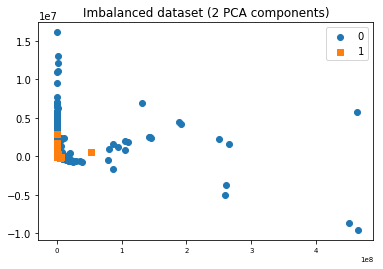

In [18]:
plot_2d_space(X_h5, y_h5, 'Imbalanced dataset (2 PCA components)')

In [19]:
X_h5.shape


(4742446, 257)

In [91]:
def random_undersample(X, y, label= "Random UnderSampling", plot=False, sampling_strategy='auto'):
    rus = RandomUnderSampler(return_indices=True, random_state=42, sampling_strategy=sampling_strategy)
    X_rus, y_rus, id_rus = rus.fit_sample(X, y)
    X_rus= pd.DataFrame(X_rus, columns=X.columns)
    y_rus= pd.Series(y_rus, name=y.name)

    print('Removed indexes:', id_rus)
    #plot Random under-sampling using PCA
    if plot==True:
        pca = PCA(n_components=2)
        X_pca = pd.DataFrame(pca.fit_transform(X_rus))
        colors = ['#1F77B4', '#FF7F0E']
        markers = ['o', 's']
        for l, c, m in zip(np.unique(y_rus), colors, markers):
            plt.scatter( 
                X_pca.loc[y_rus.reset_index(drop=True)== l, 0],# pc 1
                X_pca.loc[y_rus.reset_index(drop=True)== l, 1], # pc 2
                c=c, label=l, marker=m
            )
        plt.title(label)
        plt.legend(loc='upper right')
        plt.show()

    return rus, id_rus, X_rus, y_rus

In [92]:
rus, id_rus, X_rus, y_rus= random_undersample(X_h5, y_h5)

Removed indexes: [1193185 4567853 1746683 ... 4742212 4742345 4742347]


In [98]:
X_rus.shape

(84732, 257)

In [99]:
y_rus.shape

(84732,)

In [100]:
y_rus.value_counts()/y_rus.shape

1    0.5
0    0.5
Name: dep_purchase_lexus_new_luv_6mo, dtype: float64

Removed indexes: [1193185 4567853 1746683 ... 4742212 4742345 4742347]


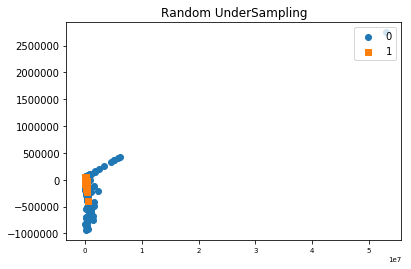

In [26]:
rus, id_rus, X_rus, y_rus= random_undersample(X_h5, y_h5, plot=True, sampling_strategy='not minority')

# Under-sampling: Tomek links
Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [ ]:
#In the code below, we'll use ratio='majority' to resample the majority class.
def undersample_tomek_link(X,y, label= 'Tomek links under-sampling', plot=False):
    tl = TomekLinks(return_indices=True, ratio='all')
    X_tl, y_tl, id_tl = tl.fit_sample(X, y)
    X_tl= pd.DataFrame(X_tl, columns=X.columns)
    y_tl= pd.Series(y_tl, name=y.name)
    if plot== True:
        #print('Removed indexes:', id_tl)
        # plotting using pca
        pca = PCA(n_components=2)
        X_pca = pd.DataFrame(pca.fit_transform(X_tl))
        colors = ['#1F77B4', '#FF7F0E']
        markers = ['o', 's']
        for l, c, m in zip(np.unique(y_tl), colors, markers):
            plt.scatter( 
                X_pca.loc[y_tl== l, 0],# pc 1
                X_pca.loc[y_tl== l, 1], # pc 2
                c=c, label=l, marker=m
            )
        plt.title(label)
        plt.legend(loc='upper right')
        plt.show()
    return X_tl, y_tl, tl, id_tl

In [ ]:
X_tl, y_tl, tl, id_tl= data_prep.undersample_tomek_link(X_h5, y_h5, plot=True)

In [ ]:
X_tl.head()

In [47]:
y_tl.head()

0    0
1    0
2    0
3    0
4    1
Name: dep_purchase_lexus_12mo, dtype: int32

# Under-sampling: Cluster Centroids
This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.

In [ ]:
from imblearn.under_sampling import ClusterCentroids

In [ ]:
def undersample_cluster_centroid(X,y, label= 'Cluster Centroids under-sampling', plot=False,
                                sampling_strategy='auto', random_state=None, 
                          estimator=None, voting='auto', n_jobs=-1, ratio=None):
    
    '''
    voting:str, optional (default=’auto’)
    Voting strategy to generate the new samples:

    If 'hard', the nearest-neighbors of the centroids found using the clustering algorithm will be used.
    If 'soft', the centroids found by the clustering algorithm will be used.
    '''
    cc = ClusterCentroids(sampling_strategy=sampling_strategy, random_state=random_state, 
                          estimator=estimator, voting=voting, n_jobs=n_jobs, ratio=ratio)
    X_cc, y_cc = cc.fit_sample(X, y)
    X_cc= pd.DataFrame(X_cc, columns=X.columns)
    y_cc= pd.Series(y_cc, name=y.name)
    if plot== True:
        # plotting using pca
        pca = PCA(n_components=2)
        X_pca = pd.DataFrame(pca.fit_transform(X_cc))
        colors = ['#1F77B4', '#FF7F0E']
        markers = ['o', 's']
        for l, c, m in zip(np.unique(y_cc), colors, markers):
            plt.scatter( 
                X_pca.loc[y_cc.reset_index(drop=True)== l, 0],# pc 1
                X_pca.loc[y_cc.reset_index(drop=True)== l, 1], # pc 2
                c=c, label=l, marker=m
            )
        plt.title(label)
        plt.legend(loc='upper right')
        plt.show()
    return X_cc, y_cc, cc

In [ ]:
X_cc, y_cc, cc= data_prep.undersample_cluster_centroid(X_h5,y_h5, plot=True)

# Over-sampling: SMOTE
SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.



We'll use ratio='minority' to resample the minority class.


In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
def oversample_SMOTE(X,y, label='SMOTE over-sampling', plot= False):

    smote = SMOTE(ratio='minority')
    X_sm, y_sm = smote.fit_sample(X, y)
    X_sm= pd.DataFrame(X_sm, columns=X.columns)
    y_sm= pd.Series(y_sm, name=y.name)
    if plot== True:
        # plotting using pca
        pca = PCA(n_components=2)
        X_pca = pd.DataFrame(pca.fit_transform(X_sm))
        colors = ['#1F77B4', '#FF7F0E']
        markers = ['o', 's']
        for l, c, m in zip(np.unique(y_sm), colors, markers):
            plt.scatter( 
                X_pca.loc[y_sm.reset_index(drop=True)== l, 0],# pc 1
                X_pca.loc[y_sm.reset_index(drop=True)== l, 1], # pc 2
                c=c, label=l, marker=m
            )
        plt.title(label)
        plt.legend(loc='upper right')
        plt.show()
    return X_sm, y_sm, smote

In [ ]:
X_sm, y_sm, smote=oversample_SMOTE(X,y, plot=True)

# Over-sampling followed by under-sampling
Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:




In [ ]:
from imblearn.combine import SMOTETomek


In [ ]:
def over_under_SMOTETomek(X, y, label='SMOTE + Tomek links', plot= False):
    smt = SMOTETomek(ratio='auto')
    X_smt, y_smt = smt.fit_sample(X, y)
    X_smt= pd.DataFrame(X_smt, columns=X.columns)
    y_smt= pd.Series(y_smt, name=y.name)    
    if plot== True:
        # plotting using pca
        pca = PCA(n_components=2)
        X_pca = pd.DataFrame(pca.fit_transform(X_smt))
        colors = ['#1F77B4', '#FF7F0E']
        markers = ['o', 's']
        for l, c, m in zip(np.unique(y_smt), colors, markers):
            plt.scatter( 
                X_pca.loc[y_smt.reset_index(drop=True)== l, 0],# pc 1
                X_pca.loc[y_smt.reset_index(drop=True)== l, 1], # pc 2
                c=c, label=l, marker=m
            )
        plt.title(label)
        plt.legend(loc='upper right')
        plt.show()
    return X_smt, y_smt, smt

In [ ]:
X_smt, y_smt, smt= over_under_SMOTETomek(X, y, plot=True)

Undersampling- check recall score

In [102]:
from sklearn.svm import SVC
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score

In [103]:
from sklearn.model_selection import train_test_split

### Data Split

In [104]:
X_train, X_test,y_train, y_test= train_test_split(X_rus,y_rus)

In [105]:
X_train.shape

(63549, 257)

In [106]:
X_test.shape

(21183, 257)

In [107]:
def learning_curve(X_train, X_test,y_train, y_test, model=sklearn.svm.SVC(), observations=[35568, 355683, 1556834, 2556834, 3556834]):
    recalls = []
    f1s=[]
    precs=[]
    accs=[]
    
    for n in observations:
        rus = RandomUnderSampler(sampling_strategy='auto', return_indices=False, random_state=None, replacement=False, ratio=None)
        rus.fit(X_train, y_train)
        X_resampled, y_resampled= rus.fit_sample(X_train, y_train)
        model.fit(X_resampled, y_resampled)
        y_pred= model.predict(X_test)
        
        f1=f1_score(y_pred= y_pred, y_true=y_test, average='macro')
        acc =accuracy_score(y_pred= y_pred, y_true=y_test)
        prec=precision_score(y_pred= y_pred, y_true=y_test, average='weighted')
        recall=recall_score(y_pred= y_pred, y_true=y_test)
        
        f1s.append(f1)
        accs.append(acc)
        precs.append(prec)
        recalls.append(recall)
    plt.plot(observations, f1s, linewidth=4, color= 'blue', label= 'f1')
    plt.plot(observations, accs, linewidth=4, color= 'red', label= 'aacuracy')
    plt.plot(observations, precs, linewidth=4, color= 'green', label= 'precision')
    plt.plot(observations, recalls, linewidth=4, color= 'orange', label='recalls')
    plt.legend()
    
    plt.title("RandomUnderSampler Learning Curve", fontsize=16)
    plt.gca().set_xlabel("# of Points per Class", fontsize=14)
    plt.gca().set_ylabel("Training Accuracy", fontsize=14)
    sns.despine()
    return f1s,accs,precs,recalls, rus, model

In [ ]:
f1s,accs,precs,recalls, rus, model= learning_curve(X_train, X_test,y_train, y_test)

/root/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



# Feature Selection

In [108]:
gc.collect()

73300

In [80]:
import feature_selection

In [ ]:
rank_df= feature_selection.feature_ranking(X_h5,y_h5, estimator='dt')

In [ ]:
gc.collect()

In [ ]:
embeded_lr_feature, X_new= feature_selection.feature_selection(X_h5,y_h5, estimator='dt', threshold='1.5*median')

In [ ]:
X_new.shape

In [ ]:
embeded_lr_feature

In [ ]:
pd.set_option('display.max_rows', 500)


In [ ]:
X_new.shape

In [ ]:
y.shape

In [ ]:
df= pd.concat([X_new.reset_index(drop=True), y.reset_index(drop=True)], axis=1)

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X_new.reset_index(drop=True), y_h5 )

log= mlModels.logistic_regression(X_train, y_train, X_test, y_test)

sgd=mlModels.sgd(X_train, y_train, X_test, y_test, loss= 'log')

gcp= mlModels.gpc(X_train, y_train, X_test, y_test)

dt= mlModels.dt(X_train, y_train, X_test, y_test)

rf= mlModels.rf(X_train, y_train, X_test, y_test, criterion='entropy', n_estimators=150)

xgb= mlModels.xgb(X_train, y_train, X_test, y_test)

gb= mlModels.gb(X_train, y_train, X_test, y_test)

ada=mlModels.mcp(X_train, y_train, X_test, y_test)

#fig, ax = plt.subplots()


# Logistic regression

In [ ]:


import mlModels

log= mlModels.logistic_regression(X_train, y_train, X_test, y_test, False)



dt= mlModels.dt(X_train, y_train, X_test, y_test)

rf= mlModels.rf(X_train, y_train, X_test, y_test, criterion='entropy', n_estimators=150)

xgb= mlModels.xgb(X_train, y_train, X_test, y_test)

gb= mlModels.gb(X_train, y_train, X_test, y_test)

ada=mlModels.mcp(X_train, y_train, X_test, y_test)

#fig, ax = plt.subplots()


In [76]:
gc.collect()

10139

In [73]:
import pickle

In [77]:
Log_reg_pkl_filename = os.path.join(mlobjects+'Log_reg.pkl')
# Open the file to save as pkl file
Log_reg_model_pkl = open(Log_reg_pkl_filename, 'wb')
pickle.dump(log, Log_reg_model_pkl)
# Close the pickle instances
Log_reg_model_pkl.close()

# Stochastic gredient Descent

cross_val_score [0.49028401 0.49665644 0.51365174 0.5335589  0.50098355]
accuracy 53.85450597176982
balanced_accuracy_score 53.62053534711705
f1_score 45.082657785721
precision_score 59.728046004881485
Log loss 15.938430912230308
recall_score 93.27013328327389


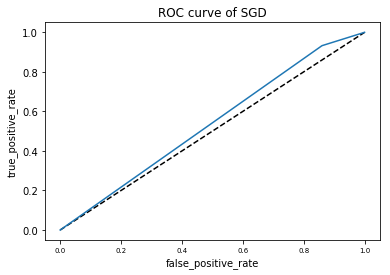

roc_auc_score 53.619896172768414
confusion_matrix [[1471 9058]
 [ 717 9937]]
classification_report              precision    recall  f1-score   support

           0       0.67      0.14      0.23     10529
           1       0.52      0.93      0.67     10654

   micro avg       0.54      0.54      0.54     21183
   macro avg       0.60      0.54      0.45     21183
weighted avg       0.60      0.54      0.45     21183


 Time taken to execute the SGD is 49.4020299911499

Dated on2018-12-26 02:45:20.348659



In [137]:
sgd= mlModels.sgd(X_train, y_train, X_test, y_test, lime_flag=False)

In [138]:
#roc_auc_score
y_pred_proba_sgd = sgd.predict_proba(X_train)[:,1]
roc= roc_auc_score(y_train, y_pred_proba_sgd)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.5340082228418362


In [139]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_train, sgd.predict(X_train)))

confusion_matrix  [[ 4363 27474]
 [ 2189 29523]]


In [ ]:
sgd_pkl_filename = os.path.join(mlobjects+'SGD.pkl')
# Open the file to save as pkl file
sgd_model_pkl = open(sgd_pkl_filename, 'wb')
pickle.dump(sgd, sgd_model_pkl)
# Close the pickle instances
sgd_model_pkl.close()

In [141]:
gc.collect()

14072

# Gaussian Process Classifier

In [ ]:
gpc= mlModels.gpc(X_train, y_train, X_test, y_test, lime_flag=True)

In [ ]:
gc.collect()

# Decision Tree

212 Features have more than zero importance
                                      Importance
customer_language_english_ind           0.421215
max_value_vehicles_per_hh               0.033699
days_since_last_purchase_vehicle        0.033690
ever_service_lexus_LUV_ind              0.022505
avg_no_vehicles_per_hh                  0.019774
days_since_first_purchase_vehicle       0.018041
length_of_residence                     0.017845
avg_zip3_vehicle_val                    0.017398
avg_service_assoc_length                0.016231
avg_mileage_permonth_recent_vehicle     0.014924
pma_toy_scion_dealership_cd             0.014785
first_purchase_vehicle_msrp             0.014156
avg_custpay_recent_vehicle              0.013468
est_current_mileage                     0.013385
last_reported_mileage_recent_vehicle    0.013377
last_serviced_dealer_no                 0.012951
pma_lexus_dealership_cd                 0.012068
i1_occupation_grp_val                   0.008878
no_of_adlts_per_hh_cd    

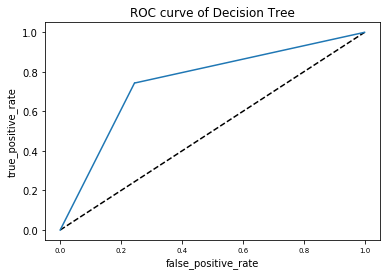

roc_auc_score 74.96650352001427
confusion_matrix [[7956 2573]
 [2720 7934]]
classification_report              precision    recall  f1-score   support

           0       0.75      0.76      0.75     10529
           1       0.76      0.74      0.75     10654

   micro avg       0.75      0.75      0.75     21183
   macro avg       0.75      0.75      0.75     21183
weighted avg       0.75      0.75      0.75     21183


 Time taken to execute the Decision Tree is 4.17197847366333

Dated on2018-12-26 00:30:47.231980



In [110]:
dt= mlModels.dt(X_train, y_train, X_test, y_test, lime_flag= False)

In [117]:
#roc_auc_score
y_pred_proba_dt = dt.predict_proba(X_train)[:,1]
roc= roc_auc_score(y_train, y_pred_proba_dt)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.9999995443807536


In [112]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_train, dt.predict(X_train)))

confusion_matrix  [[31836     1]
 [    7 31705]]


In [118]:
#roc_auc_score
y_pred_proba_dt = dt.predict_proba(X_test)[:,1]
roc= roc_auc_score(y_test, y_pred_proba_dt)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.7496650352001427


In [39]:
feat_imp= pd.DataFrame(dt.feature_importances_,index = X_train.columns,
                                       columns=['importance']).sort_values('importance',ascending=False)
#print(feat_imp.loc[feat_imp['importance']>0].shape[0] , "Features with more than zero importance")
#print(feat_imp.loc[feat_imp['importance']>0])

In [41]:
DecisionTree_pkl_filename = os.path.join(mlobjects+'DecisionTree_.pkl')
# Open the file to save as pkl file
DecisionTree_model_pkl = open(DecisionTree_pkl_filename, 'wb')
pickle.dump(dt, DecisionTree_model_pkl)
# Close the pickle instances
DecisionTree_model_pkl.close()

# Random Forest

cross_val_score [0.80709622 0.81527811 0.81729483 0.81383272 0.81202298]
accuracy 81.57012698862295
balanced_accuracy_score 81.54263008530722
f1_score 81.52128959408024
precision_score 81.82414089804757
Log loss 6.3655445057771045
recall_score 86.2023653088042


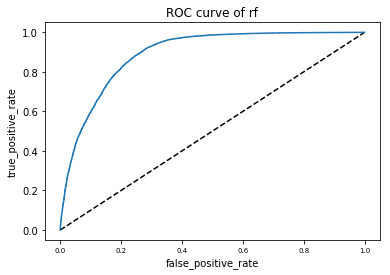

roc_auc_score 89.07688122783806
confusion_matrix [[8095 2434]
 [1470 9184]]
classification_report              precision    recall  f1-score   support

           0       0.85      0.77      0.81     10529
           1       0.79      0.86      0.82     10654

   micro avg       0.82      0.82      0.82     21183
   macro avg       0.82      0.82      0.82     21183
weighted avg       0.82      0.82      0.82     21183


 Time taken to execute the rf is 0.7108154296875

Dated on2018-12-26 00:36:26.376342



In [114]:
rf= mlModels.rf(X_train, y_train, X_test, y_test, lime_flag= False)

In [115]:
import os

In [90]:
rf_pkl_path= os.path.join(mlobjects + 'rf.pkl')
rf_model_pkl =open(rf_pkl_path, 'wb')
pickle.dump(rf, rf_model_pkl)
rf_model_pkl.close()

In [120]:
#roc_auc_score
y_pred_proba_rf = rf.predict_proba(X_train)[:,1]
roc= roc_auc_score(y_train, y_pred_proba_rf)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.9251191313586578


In [122]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_train, rf.predict(X_train)))

confusion_matrix  [[25376  6461]
 [ 3274 28438]]


In [123]:
#roc_auc_score
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]
roc= roc_auc_score(y_test, y_pred_proba_rf)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.8907688122783806


In [124]:
print('confusion_matrix ', confusion_matrix(y_test, rf.predict(X_test)))

confusion_matrix  [[8095 2434]
 [1470 9184]]


# Extreme Gradient Boosting

cross_val_score [0.82676422 0.82747227 0.83114328 0.83012039 0.82421906]
accuracy 83.04300618420432
balanced_accuracy_score 82.9907112188363
f1_score 82.8933971596919
precision_score 84.07395747914272
Log loss 5.8568410005154625
recall_score 91.85282522996057


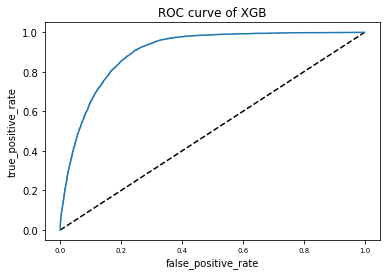

roc_auc_score 90.09556779747277
confusion_matrix [[7805 2724]
 [ 868 9786]]
classification_report              precision    recall  f1-score   support

           0       0.90      0.74      0.81     10529
           1       0.78      0.92      0.84     10654

   micro avg       0.83      0.83      0.83     21183
   macro avg       0.84      0.83      0.83     21183
weighted avg       0.84      0.83      0.83     21183


 Time taken to execute the XGB is 1.801182508468628

Dated on2018-12-26 01:40:15.020811



In [130]:
xgb= mlModels.xgb(X_train, y_train, X_test, y_test, lime_flag= False)

In [157]:
grid= mlModels.grid_search(X_train, y_train, X_test, y_test, lime_flag=False, tuned_parameters=[{'max_depth':[5,7, 3], 'learning_rate'[0.01, 0.02], 'n_estimators'= [125, 150, 175],
                                                                                                 'gamma'= [0, .1], 'max_delta_step'=[.001,.01], 'subsample'=[1,2,5], 'colsample_bytree'=[.3,.5], 
                                                                                                 'reg_alpha'=[0, .05, .01]}] , 
                                                                                                model=XGBClassifier(objective='binary:logistic', booster='gbtree', n_jobs=-1, nthread=None))

# Tuning hyper-parameters for precision



XGBoostError: b'value 2 for Parameter subsample exceed bound [0,1]'

In [92]:
xgb_pkl_path= os.path.join(mlobjects + 'xgb.pkl')
xgb_model_pkl =open(xgb_pkl_path, 'wb')
pickle.dump(xgb, xgb_model_pkl)
xgb_model_pkl.close()

In [133]:
#roc_auc_score
y_pred_proba_xgb = xgb.predict_proba(X_train)[:,1]
roc= roc_auc_score(y_train, y_pred_proba_xgb)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.904385068709918


In [134]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_train, xgb.predict(X_train)))

confusion_matrix  [[23628  8209]
 [ 2488 29224]]


# Sklearn Gradient Boosting

cross_val_score [0.8265282  0.82943907 0.83098592 0.83098592 0.82414037]
accuracy 83.00996081763678
balanced_accuracy_score 82.95980976887687
f1_score 82.87157988213431
precision_score 83.95290939846396
Log loss 5.868253144633591
recall_score 91.45860709592641


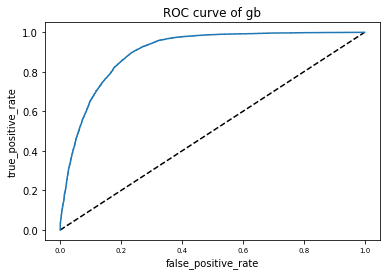

roc_auc_score 90.11560239204893
confusion_matrix [[7840 2689]
 [ 910 9744]]
classification_report              precision    recall  f1-score   support

           0       0.90      0.74      0.81     10529
           1       0.78      0.91      0.84     10654

   micro avg       0.83      0.83      0.83     21183
   macro avg       0.84      0.83      0.83     21183
weighted avg       0.84      0.83      0.83     21183


 Time taken to execute the gb is 93.13912463188171

Dated on2018-12-26 02:38:12.719978



In [135]:
gb=mlModels.gb(X_train, y_train, X_test, y_test)

In [133]:
#roc_auc_score
y_pred_proba_gb = gb.predict_proba(X_train)[:,1]
roc= roc_auc_score(y_train, y_pred_proba_gb)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.904385068709918


In [134]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_train, gb.predict(X_train)))

confusion_matrix  [[23628  8209]
 [ 2488 29224]]


In [96]:
gb_pkl_path= os.path.join(mlobjects + 'gb.pkl')
gb_model_pkl =open(gb_pkl_path, 'wb')
pickle.dump(gb, gb_model_pkl)
gb_model_pkl.close()

# Multi-layer Perceptron

In [143]:
import dlModels

cross_val_score [0.55959405 0.72818818 0.71044142 0.73530569 0.51915965]
accuracy 63.82948590851154
balanced_accuracy_score 64.00250611614969
f1_score 60.52245846480098
precision_score 71.35307624272708
Log loss 12.492879519180434
recall_score 34.68180964895814


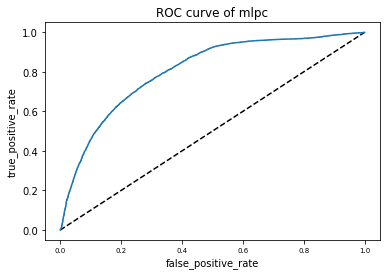

roc_auc_score 80.56075888840574
confusion_matrix [[9826  703]
 [6959 3695]]
classification_report              precision    recall  f1-score   support

           0       0.59      0.93      0.72     10529
           1       0.84      0.35      0.49     10654

   micro avg       0.64      0.64      0.64     21183
   macro avg       0.71      0.64      0.61     21183
weighted avg       0.71      0.64      0.60     21183


 Time taken to execute the mlpc is 82.00234031677246

Dated on2018-12-26 02:53:47.908018



In [144]:
mlpc= dlModels.mlpc(X_train, y_train, X_test, y_test)

In [145]:
#roc_auc_score
y_pred_proba_mlpc = mlpc.predict_proba(X_train)[:,1]
roc= roc_auc_score(y_train, y_pred_proba_mlpc)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.8081318703222363


In [146]:
#confusion_matrix
print('confusion_matrix ', confusion_matrix(y_train, mlpc.predict(X_train)))

confusion_matrix  [[29885  1952]
 [20632 11080]]


In [99]:
mlpc_pkl_path= os.path.join(mlobjects + 'mlpc.pkl')
mlpc_model_pkl =open(mlpc_pkl_path, 'wb')
pickle.dump(mlpc, mlpc_model_pkl)
mlpc_model_pkl.close()

# Adaboost

Intercept 0.5528592603497905
Prediction_local [0.55285926]
Right: 1



Lime Output [('owned_toyota_sportscar_ind <= 0.00', 0.0), ('first_purchase_prius_ind <= 0.00', 0.0), ('purchased_vehicle_suv_ind <= 0.00', 0.0), ('owned_highlander_ind <= 0.00', 0.0), ('owned_red_vehicle_ind <= 0.00', 0.0), ('tc_active_ind <= 0.00', 0.0), ('customer_language_spanish_ind <= 0.00', 0.0), ('owned_suv_ind <= 0.00', 0.0), ('current_participator <= 0.00', 0.0), ('current_owned_toyota_sportscar_ind <= 0.00', 0.0)]
cross_val_score [0.82086382 0.82015577 0.82783854 0.82461248 0.82036352]
accuracy 82.43874805268375
balanced_accuracy_score 82.39233794518871
f1_score 82.31541610814142
precision_score 83.22460636162211
Log loss 6.065542780030002
recall_score 90.25718040172706


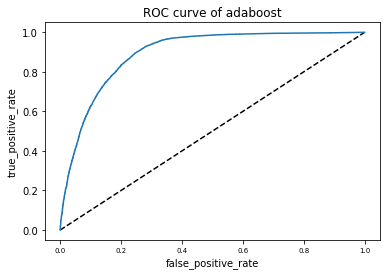

roc_auc_score 89.40034445524631
confusion_matrix [[7847 2682]
 [1038 9616]]
classification_report              precision    recall  f1-score   support

           0       0.88      0.75      0.81     10529
           1       0.78      0.90      0.84     10654

   micro avg       0.82      0.82      0.82     21183
   macro avg       0.83      0.82      0.82     21183
weighted avg       0.83      0.82      0.82     21183


 Time taken to execute the adaboost is 40.84484314918518

Dated on2018-12-26 01:26:58.742127



In [127]:
adaboost =mlModels.adaboost(X_train, y_train, X_test, y_test, lime_flag= True)

In [ ]:
adaboost_pkl_path= os.path.join(mlobjects + 'adaboost.pkl')
adaboost_model_pkl =open(adaboost_pkl_path, 'wb')
pickle.dump(adaboost, adaboost_model_pkl)
adaboost_model_pkl.close()

In [128]:
#roc_auc_score
y_pred_proba_adaboost = adaboost.predict_proba(X_train)[:,1]
roc= roc_auc_score(y_train, y_pred_proba_adaboost)
print('roc_auc_score ' + str(roc))

roc_auc_score 0.8942528306118257


# Grid Search

In [ ]:
grid= grid_search(X_train, y_train, X_test, y_test, lime_flag= True,
                tuned_parameters = {'min_samples_split': [100,200,500,1000], 
                                    #'min_samples_leaf': [1,2,3,4,5],
                     'min_weight_fraction_leaf': [.2,.1], 'max_features': [200,175,150]},  
                                    #'max_leaf_nodes': [10,20,30,40,50,70,80]},
                   model= DecisionTreeClassifier())
               

# H2O

In [148]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.model.regression import H2ORegressionModel
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
from __future__ import print_function
import pandas as pd
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,4 days 19 hours 28 mins
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,9 months and 20 days !!!
H2O cluster name:,H2O_from_python_ssaha_ybfcfa
H2O cluster total nodes:,1
H2O cluster free memory:,24.27 Gb
H2O cluster total cores:,72
H2O cluster allowed cores:,72
H2O cluster status:,"locked, healthy"


In [149]:
train= pd.concat([X_train, y_train], axis=1)
test= pd.concat([X_test, y_test], axis=1)

In [150]:
train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [43]:
y_h5.name

'dep_purchase_lexus_new_luv_6mo'

In [154]:
def h2o_deeplearning(train,test, target, model_id, 
                                   epochs=50, 
                                   hidden=[10,10], 
                                   stopping_rounds=0,  #disable early stopping
                                   seed=1,
                                   keep_cross_validation_predictions= True
                                   #balance_classes = True
                                  ):
    """
    runs ensembeled models and returns model object
    Parameter: 
    train, test- h2o dataframe of training and test set. 
    target- name of the dependent column inside the train and test set
    params: It should depend on the model you are passing
        You can also pass and of params such as 
        params = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': [i for i in range(2, 11)],
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}
    grid_model: Model on which we on to use the grid search
    Returns:
    
    returns a grid model, best model object and the prediction on test data of the best model
    """

    
    start_time          = time.time()
    # Identify predictors and response
    x=train.columns#.tolist()
       
    y = target
    x.remove(y) 
    train[y] = train[y].asfactor()
    test[y] = test[y].asfactor()
    
    '''train = h2o.H2OFrame(train)
    test = h2o.H2OFrame(test )'''

       

    # Train and validate a cartesian  the model
    dl_fit = H2ODeepLearningEstimator(model_id=model_id, 
                                   epochs=epochs, 
                                   hidden=hidden, 
                                   stopping_rounds=stopping_rounds, 
                                   seed=seed,
                                   keep_cross_validation_predictions= keep_cross_validation_predictions
                                   #balance_classes = True
                                  )
    dl_fit.train(x=x, y=y, training_frame=train)

    

    # Now let's evaluate the model performance on a test set
    
    performance = dl_fit.model_performance(test)
    pred = dl_fit.predict(test)
    
    print("Test F1:  {0}".format(performance.F1() ))
    print("Test accuracy:  {0}".format(performance.accuracy() ))
    print("Test precision:  {0}".format(performance.precision() ))
    print("Test recall:  {0}".format(performance.recall([0.01, 0.5, 0.99]) ))
    #print("Test confusion_matrix:  {0}".format(performance.confusion_matrix([ "precision", "accuracy", "f1"]) ))
    
    time_end=time.time() - start_time
    #saving logs
    f = open(mlresult_dir +str(project_identifier) +"_log_H2O_model.csv","a")

    f.write("\n Time taken to execute the H2o model is "+
        str(time_end) + "\n" +"Dated on"+ str(datetime.datetime.now()) +"\n" +
        ' Accuracy Score'+ str(performance.accuracy()) +"\n"+'F1 Score ' + str(performance.F1())+ "\n"+'precision score ' + 
        str(performance.precision())+"\n"+ 'recall score ' + str( performance.recall([0.01, 0.5, 0.99])) +"\n" )
    
    f.close()
    print("\n Time taken to execute the H2O deep learning model is "+ 
            str(time_end) + "\n" +"Dated on"+ str(datetime.datetime.now())+ "\n"             
         )
    
    return dl_fit, pred

In [152]:
import h2oModels

In [155]:
dl_fit, pred= h2o_deeplearning(train,test, 'dep_purchase_lexus_new_luv_6mo', model_id= "RM_h2o_classification")

deeplearning Model Build progress: |██████████████████████████████████████| 100%
deeplearning prediction progress: |███████████████████████████████████████| 100%
Test F1:  [[0.3918553034707688, 0.8389583690251842]]
Test accuracy:  [[0.44703475902241296, 0.8229712505310862]]
Test precision:  [[0.9962389380384588, 0.9733333333333334]]
Could not find exact threshold 0.01; using closest threshold found 0.009853943963418068.
Could not find exact threshold 0.5; using closest threshold found 0.4987192027161447.
Could not find exact threshold 0.99; using closest threshold found 0.9898022394642153.
Test recall:  [[0.01, 0.9980289093298291], [0.5, 0.877886239909893], [0.99, 0.01971090670170828]]
Could not find exact threshold 0.01; using closest threshold found 0.009853943963418068.
Could not find exact threshold 0.5; using closest threshold found 0.4987192027161447.
Could not find exact threshold 0.99; using closest threshold found 0.9898022394642153.

 Time taken to execute the H2O deep learni

In [107]:
dl_fit

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  RM_h2o_classification


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.12036201781260657
RMSE: 0.346932295718641
LogLoss: 0.38692131806778635
Mean Per-Class Error: 0.16283963678780844
AUC: 0.9026804548396984
Gini: 0.8053609096793968
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46942791731853795: 


,0,1,Error,Rate
0,3722.0,1201.0,0.244,(1201.0/4923.0)
1,437.0,4562.0,0.0874,(437.0/4999.0)
Total,4159.0,5763.0,0.1651,(1638.0/9922.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4694279,0.8477978,236.0
max f2,0.1962876,0.9092275,313.0
max f0point5,0.6535701,0.8265610,171.0
max accuracy,0.5471580,0.8375328,211.0
max precision,0.9990620,1.0,0.0
max recall,0.0018136,1.0,399.0
max specificity,0.9990620,1.0,0.0
max absolute_mcc,0.5112914,0.6781119,223.0
max min_per_class_accuracy,0.6352153,0.8244973,179.0
max mean_per_class_accuracy,0.5471580,0.8371604,211.0


Gains/Lift Table: Avg response rate: 50.38 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100786,0.9693603,1.8260132,1.8260132,0.92,0.92,0.0184037,0.0184037,82.6013203,82.6013203
,2,0.0200564,0.9590377,1.8645062,1.8451630,0.9393939,0.9296482,0.0186037,0.0370074,86.4506235,84.5163002
,3,0.0300343,0.9496610,1.8845547,1.8582495,0.9494949,0.9362416,0.0188038,0.0558112,88.4554689,85.8249502
,4,0.0400121,0.9420683,1.9246516,1.8748082,0.9696970,0.9445844,0.0192038,0.0750150,92.4651597,87.4808211
,5,0.0500907,0.9356351,1.8260132,1.8649903,0.92,0.9396378,0.0184037,0.0934187,82.6013203,86.4990302
,6,0.1000806,0.9086658,1.8447407,1.8548757,0.9294355,0.9345418,0.0922184,0.1856371,84.4740722,85.4875708
,7,0.1500706,0.8869266,1.8207311,1.8435018,0.9173387,0.9288113,0.0910182,0.2766553,82.0731082,84.3501810
,8,0.2000605,0.8666248,1.7567054,1.8218136,0.8850806,0.9178841,0.0878176,0.3644729,75.6705373,82.1813632
,9,0.3000403,0.8231208,1.6646684,1.7694495,0.8387097,0.8915015,0.1664333,0.5309062,66.4668418,76.9449489
,10,0.4000202,0.7583246,1.5346162,1.7107560,0.7731855,0.8619300,0.1534307,0.6843369,53.4616197,71.0755958



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-12-21 06:19:19,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan
,2018-12-21 06:19:20,1.170 sec,133243 obs/sec,1.5767203,1,100199.0,0.3638964,0.4182293,0.8816042,1.8458612,0.1872606
,2018-12-21 06:19:26,6.378 sec,152757 obs/sec,14.1750146,9,900808.0,0.3515951,0.3930069,0.8978188,1.8657091,0.1719411
,2018-12-21 06:19:31,11.577 sec,163256 obs/sec,28.3333019,18,1800553.0,0.3498435,0.3898674,0.9001344,1.9054051,0.1727474
,2018-12-21 06:19:36,17.026 sec,170602 obs/sec,44.0620151,28,2800097.0,0.3469323,0.3869213,0.9026805,1.8260132,0.1650877
,2018-12-21 06:19:38,19.193 sec,172746 obs/sec,50.3596909,32,3200308.0,0.3472332,0.3903202,0.9026127,1.8855571,0.1695223
,2018-12-21 06:19:38,19.236 sec,172690 obs/sec,50.3596909,32,3200308.0,0.3469323,0.3869213,0.9026805,1.8260132,0.1650877


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
customer_language_english_ind,1.0,1.0,0.0262475
lhr_incomplete_lead_ind,0.6893923,0.6893923,0.0180948
days_since_last_purchase_vehicle,0.6750049,0.6750049,0.0177172
owned_toyota_subcompact_ind,0.5960498,0.5960498,0.0156448
current_owned_toyota_subcompact_ind,0.5940416,0.5940416,0.0155921
---,---,---,---
avg_service_assoc_length,0.0604732,0.0604732,0.0015873
interest_in_travel_cd,0.0572966,0.0572966,0.0015039
has_nsh,0.0549337,0.0549337,0.0014419
avg_ro_time_0_6mo,0.0511570,0.0511570,0.0013427



See the whole table with table.as_data_frame()


In [109]:
# save the model
model_path = h2o.save_model(model=dl_fit, path=mlobjects)

print (model_path)


# load the model
saved_model = h2o.load_model(model_path)

/datascience/home/ssaha/RMModel/mlobjects/RM_h2o_classification


In [49]:
# Super learner using rf and gbm
def super_learner(train,test, target, model_id,
                  nfolds = 5,
                 ntrees=10,
                   max_depth=100,
                    min_rows=1000,
                     learn_rate=0.2,
                       fold_assignment="Modulo",
                         keep_cross_validation_predictions=True,
                          seed=1):
    """
    runs ensembeled models and returns model object
    Parameter: 
    train, test- h2o dataframe of training and test set.
    target- name of the dependent column inside the train and test set
    Returns:
    
    returns a gradient boost, random forest and ensemble model object and the prediction on test data
    """
    # Import a sample binary outcome train/test set into H2O
    start_time          = time.time()
    #train = h2o.H2OFrame(train)
    #test = h2o.H2OFrame(test )

    # Identify predictors and response
    x = train.columns
    y = target
    x.remove(y)

    # For binary classification, response should be a factor
    train[y] = train[y].asfactor()
    test[y] = test[y].asfactor()

    # Number of CV folds (to generate level-one data for stacking)
    

    # There are a few ways to assemble a list of models to stack together:
    # 1. Train individual models and put them in a list
    # 2. Train a grid of models
    # 3. Train several grids of models
    # Note: All base models must have the same cross-validation folds and
    # the cross-validated predicted values must be kept.


    # Generate a 2-model ensemble (GBM + RF)

    # Train and cross-validate a GBM
    my_gbm = H2OGradientBoostingEstimator(#distribution="bernoulli",
                                          ntrees=ntrees,
                                          max_depth=max_depth,
                                          min_rows=min_rows,
                                          learn_rate=learn_rate,
                                          nfolds=nfolds,
                                          fold_assignment=fold_assignment,
                                          keep_cross_validation_predictions=keep_cross_validation_predictions,
                                          seed=seed)
    my_gbm.train(x=x, y=y, training_frame=train)


    # Train and cross-validate a RF
    my_rf = H2ORandomForestEstimator(ntrees=ntrees,
                                     nfolds=nfolds,
                                     fold_assignment=fold_assignment,
                                     keep_cross_validation_predictions=keep_cross_validation_predictions,
                                     seed=seed)
    my_rf.train(x=x, y=y, training_frame=train)


    # Train a stacked ensemble using the GBM and GLM above
    ensemble = H2OStackedEnsembleEstimator(model_id=model_id,
                                           base_models=[my_gbm, my_rf])
    ensemble.train(x=x, y=y, training_frame=train)

    # Eval ensemble performance on the test data
    per_stack_test = ensemble.model_performance(test)

    # Compare to base learner performance on the test set
    per_gbm_test = my_gbm.model_performance(test)
    per_rf_test = my_rf.model_performance(test)
    baselearner_best_recall_test = max(per_gbm_test.recall([0.01, 0.5, 0.99]), per_rf_test.recall([0.01, 0.5, 0.99]))
    stack_recall_test = per_stack_test.recall([0.01, 0.5, 0.99])
    print("Best Base-learner Test Recall:  {0}".format(baselearner_best_recall_test))
    print("Ensemble Test Recall:  {0}".format(stack_recall_test))

    # Generate predictions on a test set 
    pred = ensemble.predict(test)
    time_end=time.time() - start_time
    f = open(mlresult_dir +str(project_identifier) +"_log_H2O_model.csv","a")
    
    f.write("\n Time taken to execute the H2O Supre Learner model is "+ 
            str(time_end) + "\n" +"Dated on"+ str(datetime.datetime.now())+
            "Best Base-learner Test recall:" + str(baselearner_best_recall_test)+
            "Ensemble Test recall:"+ str(stack_recall_test)
           )
    f.close()
 
    print("\n Time taken to execute the H2O Supre Learner model is "+ 
            str(time_end) + "\n" +"Dated on"+ str(datetime.datetime.now())+
            "Best Base-learner Test recall:" + str(baselearner_best_recall_test)+
            "Ensemble Test recall:"+ str(stack_recall_test)
           )
        
    print("Test F1:  {0}".format(per_stack_test.F1() ))
    print("Test accuracy:  {0}".format(per_stack_test.accuracy() ))
    print("Test precision:  {0}".format(per_stack_test.precision() ))
    print("Test recall:  {0}".format(per_stack_test.recall([0.01, 0.5, 0.99]) ))

    
    return my_gbm, my_rf, ensemble, pred

In [25]:
import h2oModels

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /root/anaconda3/h2o_jar/h2o.jar
  Ice root: /tmp/tmpw20ha34w
  JVM stdout: /tmp/tmpw20ha34w/h2o_ssaha_started_from_python.out
  JVM stderr: /tmp/tmpw20ha34w/h2o_ssaha_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,9 months and 15 days !!!
H2O cluster name:,H2O_from_python_ssaha_ybfcfa
H2O cluster total nodes:,1
H2O cluster free memory:,26.67 Gb
H2O cluster total cores:,72
H2O cluster allowed cores:,72
H2O cluster status:,"accepting new members, healthy"


In [50]:
my_gbm, my_rf, ensemble, pred= super_learner(train,test, "dep_purchase_lexus_new_luv_6mo", model_id= "RM_super_learner_classification")

gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
stackedensemble Model Build progress: |███████████████████████████████████| 100%
Could not find exact threshold 0.01; using closest threshold found 0.06876179256162734.
Could not find exact threshold 0.5; using closest threshold found 0.49874102147320987.
Could not find exact threshold 0.99; using closest threshold found 0.9016508100310127.
Could not find exact threshold 0.01; using closest threshold found 0.009970790973076453.
Could not find exact threshold 0.5; using closest threshold found 0.49995954462414616.
Could not find exact threshold 0.99; using closest threshold found 0.989522433584142.
Could not find exact threshold 0.01; using closest threshold found 0.03542768000316076.
Could not find exact threshold 0.5; using closest threshold found 0.4986725790590963.
Could not find exact threshold 0.99; using closest threshol

In [54]:
my_gbm

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1545400130355_175


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.12540182746428843
RMSE: 0.3541212044827144
LogLoss: 0.4025765038759066
Mean Per-Class Error: 0.17185803289554702
AUC: 0.9012498243448772
Gini: 0.8024996486897544
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.443888964770874: 


,0,1,Error,Rate
0,22593.0,9294.0,0.2915,(9294.0/31887.0)
1,1984.0,29678.0,0.0627,(1984.0/31662.0)
Total,24577.0,38972.0,0.1775,(11278.0/63549.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4438890,0.8403319,250.0
max f2,0.2048564,0.9088572,314.0
max f0point5,0.6593110,0.8209139,152.0
max accuracy,0.5409557,0.8278966,215.0
max precision,0.8819244,0.9839142,6.0
max recall,0.0705879,1.0,397.0
max specificity,0.9004573,0.9999686,0.0
max absolute_mcc,0.5094611,0.6635894,228.0
max min_per_class_accuracy,0.6222863,0.8193621,173.0
max mean_per_class_accuracy,0.5409557,0.8281420,215.0


Gains/Lift Table: Avg response rate: 49.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100238,0.8763174,1.9661450,1.9661450,0.9795918,0.9795918,0.0197082,0.0197082,96.6144957,96.6144957
,2,0.0200003,0.8693788,1.9596196,1.9628900,0.9763407,0.9779701,0.0195502,0.0392584,95.9619568,96.2889964
,3,0.0300083,0.8644421,1.9218990,1.9492191,0.9575472,0.9711589,0.0192344,0.0584928,92.1898967,94.9219133
,4,0.0400006,0.8604992,1.8996392,1.9368339,0.9464567,0.9649882,0.0189817,0.0774746,89.9639201,93.6833902
,5,0.0500087,0.8566768,1.8934965,1.9281610,0.9433962,0.9606671,0.0189502,0.0964247,89.3496519,92.8160971
,6,0.1000016,0.8399452,1.8712776,1.8997238,0.9323261,0.9464988,0.0935506,0.1899754,87.1277586,89.9723754
,7,0.1500260,0.8239686,1.8107521,1.8700572,0.9021705,0.9317181,0.0905818,0.2805571,81.0752091,87.0057201
,8,0.2000031,0.8043848,1.7410510,1.8378209,0.8674433,0.9156570,0.0870128,0.3675700,74.1050971,83.7820869
,9,0.3000205,0.7508635,1.6509049,1.7755090,0.8225299,0.8846114,0.1651191,0.5326890,65.0904939,77.5509023
,10,0.4000063,0.6914883,1.5323375,1.7147257,0.7634561,0.8543273,0.1532121,0.6859011,53.2337537,71.4725718




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.1272835339754817
RMSE: 0.35676817960053797
LogLoss: 0.4077702645126318
Mean Per-Class Error: 0.1745015839314472
AUC: 0.8962176162124458
Gini: 0.7924352324248916
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.45704815893262196: 


,0,1,Error,Rate
0,22590.0,9297.0,0.2916,(9297.0/31887.0)
1,2039.0,29623.0,0.0644,(2039.0/31662.0)
Total,24629.0,38920.0,0.1784,(11336.0/63549.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4570482,0.8393925,249.0
max f2,0.2176123,0.9085471,303.0
max f0point5,0.6420855,0.8160267,164.0
max accuracy,0.5438159,0.8252530,215.0
max precision,0.8965461,1.0,0.0
max recall,0.0706086,1.0,397.0
max specificity,0.8965461,1.0,0.0
max absolute_mcc,0.4570482,0.6609661,249.0
max min_per_class_accuracy,0.6213241,0.8150657,176.0
max mean_per_class_accuracy,0.5438159,0.8254984,215.0


Gains/Lift Table: Avg response rate: 49.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100080,0.8735355,1.9155873,1.9155873,0.9544025,0.9544025,0.0191712,0.0191712,91.5587312,91.5587312
,2,0.0200003,0.8677445,1.8996392,1.9076195,0.9464567,0.9504327,0.0189817,0.0381530,89.9639201,90.7619530
,3,0.0300083,0.8631942,1.8777174,1.8976469,0.9355346,0.9454641,0.0187922,0.0569452,87.7717382,89.7646921
,4,0.0400006,0.8593640,1.8901568,1.8957759,0.9417323,0.9445319,0.0188870,0.0758322,89.0156809,89.5775866
,5,0.0500087,0.8558673,1.8840290,1.8934250,0.9386792,0.9433606,0.0188554,0.0946876,88.4029037,89.3425022
,6,0.1000016,0.8392319,1.8403213,1.8668773,0.9169027,0.9301338,0.0920030,0.1866907,84.0321272,86.6877325
,7,0.1500102,0.8225234,1.7936381,1.8424617,0.8936438,0.9179692,0.0896974,0.2763881,79.3638113,84.2461693
,8,0.2000031,0.8020024,1.7499794,1.8193448,0.8718917,0.9064516,0.0874866,0.3638747,74.9979377,81.9344752
,9,0.3000047,0.7493711,1.6363207,1.7583367,0.8152636,0.8760556,0.1636346,0.5275093,63.6320660,75.8336722
,10,0.4000063,0.6912162,1.5422030,1.7043033,0.7683714,0.8491345,0.1542227,0.6817320,54.2203008,70.4303293



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8226879,0.0027750,0.8292683,0.818096,0.8225806,0.8240755,0.8194193
auc,0.8962523,0.0010099,0.8983321,0.8945298,0.8958027,0.8974605,0.8951362
err,0.1773120,0.0027750,0.1707317,0.1819040,0.1774194,0.1759245,0.1805807
err_count,2253.6,35.249397,2170.0,2312.0,2255.0,2236.0,2295.0
f0point5,0.7921118,0.0045945,0.803326,0.7869438,0.7940394,0.7915247,0.7847248
f1,0.8400286,0.0021712,0.8421129,0.8352572,0.8425170,0.8427567,0.8374991
f2,0.8941976,0.0042043,0.8848353,0.8898910,0.8972986,0.9010797,0.8978836
lift_top_group,1.9225832,0.0168141,1.901396,1.9547249,1.8991628,1.9098563,1.9477758
logloss,0.4077703,0.0023495,0.4034858,0.4121611,0.4087737,0.4043922,0.4100387
max_per_class_error,0.2882776,0.0114814,0.2562979,0.2923101,0.2955885,0.2960578,0.3011337


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-12-21 07:55:56,8.928 sec,0.0,0.4999969,0.6931409,0.5,1.0,0.5017703
,2018-12-21 07:55:57,9.050 sec,1.0,0.4546713,0.6058253,0.8881665,1.8978148,0.1828196
,2018-12-21 07:55:57,9.170 sec,2.0,0.4231977,0.5474208,0.8911454,1.9377962,0.1830084
,2018-12-21 07:55:57,9.300 sec,3.0,0.4011953,0.5062283,0.8935847,1.9337395,0.1789171
,2018-12-21 07:55:57,9.431 sec,4.0,0.3861699,0.4768498,0.8945338,1.9313664,0.1795937
,2018-12-21 07:55:57,9.574 sec,5.0,0.3754389,0.4546786,0.8959983,1.9409380,0.1795308
,2018-12-21 07:55:57,9.710 sec,6.0,0.3681935,0.4385018,0.8968810,1.9439898,0.1794049
,2018-12-21 07:55:57,9.851 sec,7.0,0.3628611,0.4258681,0.8983124,1.9598432,0.1791059
,2018-12-21 07:55:57,9.987 sec,8.0,0.3591303,0.4163837,0.8991180,1.9535415,0.1787754
,2018-12-21 07:55:58,10.135 sec,9.0,0.3560255,0.4082077,0.9006857,1.9692364,0.1783034


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
customer_language_english_ind,18717.5371094,1.0,0.8272704
ever_service_lexus_LUV_ind,877.8252563,0.0468985,0.0387978
days_since_last_purchase_vehicle,696.0498047,0.0371870,0.0307637
max_value_vehicles_per_hh,346.2462158,0.0184985,0.0153033
driver_ind,243.6749573,0.0130185,0.0107699
---,---,---,---
noros_high_cust_pay_6_12mo,0.0,0.0,0.0
noros_high_cust_pay_0_6mo,0.0,0.0,0.0
noros_high_ro_time_18_24mo,0.0,0.0,0.0
avg_mileage_permonth_recent_vehicle,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [55]:
my_rf

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1545400130355_303


ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.1663705496233628
RMSE: 0.40788546140229465
LogLoss: 1.5902932613695984
Mean Per-Class Error: 0.22251795926947837
AUC: 0.8320043697138624
Gini: 0.6640087394277248
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.36031122893998113: 


,0,1,Error,Rate
0,21216.0,10367.0,0.3282,(10367.0/31583.0)
1,3839.0,27523.0,0.1224,(3839.0/31362.0)
Total,25055.0,37890.0,0.2257,(14206.0/62945.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3603112,0.7948651,265.0
max f2,0.1357683,0.8710016,336.0
max f0point5,0.5578924,0.7699611,196.0
max accuracy,0.4068593,0.7772023,251.0
max precision,0.9204786,0.8355354,46.0
max recall,0.0000014,1.0,399.0
max specificity,0.9999994,0.9638096,0.0
max absolute_mcc,0.4068593,0.5619648,251.0
max min_per_class_accuracy,0.5043815,0.7656399,216.0
max mean_per_class_accuracy,0.4068593,0.7774820,251.0


Gains/Lift Table: Avg response rate: 49.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0838723,1.0,1.5766893,1.5766893,0.7855535,0.7855535,0.1322405,0.1322405,57.6689329,57.6689329
,2,0.1000016,0.9850772,1.8073748,1.6138967,0.9004878,0.8040913,0.0291517,0.1613922,80.7374756,61.3896656
,3,0.1500102,0.9540806,1.7671125,1.6649740,0.8804279,0.8295395,0.0883709,0.2497631,76.7112478,66.4973954
,4,0.2000031,0.9142754,1.7082831,1.6757995,0.8511174,0.8349331,0.0854021,0.3351652,70.8283117,67.5799541
,5,0.3000047,0.7750000,1.5835769,1.6450587,0.7889851,0.8196171,0.1583602,0.4935254,58.3576875,64.5058652
,6,0.4023195,0.6666667,1.4539327,1.5964530,0.7243925,0.7954003,0.1487588,0.6422841,45.3932747,59.6453003
,7,0.5371760,0.5,1.2297917,1.5044037,0.6127188,0.7495386,0.1658455,0.8081296,22.9791743,50.4403702
,8,0.6000094,0.3478261,1.0198895,1.4536650,0.5081392,0.7242591,0.0640831,0.8722127,1.9889483,45.3665037
,9,0.7019465,0.2000000,0.6041768,1.3303019,0.3010188,0.6627959,0.0615880,0.9338008,-39.5823201,33.0301856
,10,0.8000441,0.0288136,0.2121725,1.1932022,0.1057106,0.5944888,0.0208136,0.9546144,-78.7827549,19.3202239




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.1403581969415559
RMSE: 0.3746440936963452
LogLoss: 0.4690109800360294
Mean Per-Class Error: 0.19291917398834824
AUC: 0.8743478766731893
Gini: 0.7486957533463785
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40291582154246375: 


,0,1,Error,Rate
0,22490.0,9397.0,0.2947,(9397.0/31887.0)
1,2989.0,28673.0,0.0944,(2989.0/31662.0)
Total,25479.0,38070.0,0.1949,(12386.0/63549.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4029158,0.8223771,250.0
max f2,0.2308175,0.8959473,306.0
max f0point5,0.5665110,0.7959796,192.0
max accuracy,0.4409724,0.8067948,237.0
max precision,0.9917510,0.9316988,3.0
max recall,0.0000219,1.0,399.0
max specificity,0.9998027,0.9993728,0.0
max absolute_mcc,0.4029158,0.6232515,250.0
max min_per_class_accuracy,0.5500512,0.7962806,198.0
max mean_per_class_accuracy,0.4409724,0.8070808,237.0


Gains/Lift Table: Avg response rate: 49.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100080,0.9892931,1.8650941,1.8650941,0.9292453,0.9292453,0.0186659,0.0186659,86.5094071,86.5094071
,2,0.0200003,0.9807651,1.8395841,1.8523491,0.9165354,0.9228954,0.0183817,0.0370476,83.9584051,85.2349097
,3,0.0300083,0.9734181,1.8524708,1.8523897,0.9229560,0.9229156,0.0185396,0.0555871,85.2470761,85.2389673
,4,0.0400006,0.9665245,1.8269409,1.8460325,0.9102362,0.9197482,0.0182553,0.0738425,82.6940862,84.6032476
,5,0.0500087,0.9594809,1.8051333,1.8378475,0.8993711,0.9156702,0.0180658,0.0919083,80.5133348,83.7847503
,6,0.1000016,0.9020972,1.7638781,1.8008686,0.8788165,0.8972463,0.0881814,0.1800897,76.3878130,80.0868636
,7,0.1500102,0.8724988,1.7349028,1.7788777,0.8643801,0.8862897,0.0867602,0.2668499,73.4902780,77.8877711
,8,0.2000031,0.8303335,1.7019655,1.7596527,0.8479698,0.8767113,0.0850862,0.3519361,70.1965502,75.9652684
,9,0.3000047,0.7488264,1.6240032,1.7144362,0.8091267,0.8541831,0.1624029,0.5143390,62.4003249,71.4436206
,10,0.4000063,0.6550000,1.4809318,1.6560601,0.7378442,0.8250983,0.1480955,0.6624345,48.0931784,65.6060100



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.804277,0.0037235,0.813454,0.7985838,0.8059795,0.8,0.8033677
auc,0.874347,0.0021212,0.8788816,0.8706692,0.8741636,0.8763175,0.8717029
err,0.195723,0.0037235,0.1865460,0.2014162,0.1940205,0.2,0.1966323
err_count,2487.6,47.321453,2371.0,2560.0,2466.0,2542.0,2499.0
f0point5,0.7762393,0.0058318,0.7903113,0.7683544,0.7793228,0.7679009,0.7753069
f1,0.8236488,0.0026017,0.8268458,0.8192090,0.8283925,0.8240343,0.819762
f2,0.8773796,0.0059129,0.8669219,0.8772726,0.8840567,0.8890216,0.8696251
lift_top_group,1.8660473,0.0209359,1.9171101,1.8759054,1.8374014,1.8628926,1.8369268
logloss,0.4690110,0.0040091,0.4739936,0.4741813,0.4614177,0.4628203,0.4726425
max_per_class_error,0.3081480,0.0169199,0.2680332,0.3214787,0.3164517,0.3378357,0.2969405


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2018-12-21 07:56:24,25.759 sec,0.0,nan,nan,nan,nan,nan
,2018-12-21 07:56:25,26.432 sec,1.0,0.4993265,6.9702634,0.7249720,1.4329936,0.2699347
,2018-12-21 07:56:26,27.365 sec,2.0,0.4833920,6.0378802,0.7438921,1.4458190,0.2627291
,2018-12-21 07:56:26,27.991 sec,3.0,0.4735589,5.2137539,0.7513494,1.4507403,0.2668889
,2018-12-21 07:56:27,28.533 sec,4.0,0.4605740,4.4084488,0.7675063,1.4810221,0.2616494
,2018-12-21 07:56:27,29.043 sec,5.0,0.4484372,3.7073213,0.7822649,1.5114353,0.2589166
,2018-12-21 07:56:28,29.664 sec,6.0,0.4382313,3.1141283,0.7940248,1.5285401,0.2449720
,2018-12-21 07:56:30,31.623 sec,10.0,0.4078855,1.5902933,0.8320044,1.5766893,0.2256891


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
customer_language_english_ind,15256.8691406,1.0,0.1660990
owned_vehicle_my_2011_20_ind,5114.9863281,0.3352579,0.0556860
days_since_last_purchase_vehicle,4253.1518555,0.2787696,0.0463033
purchased_vehicle_new_ind,3492.1540527,0.2288906,0.0380185
no_ro_visits_12_18mo,2459.3610840,0.1611970,0.0267746
---,---,---,---
dofu_year4_ind,0.75,0.0000492,0.0000082
owned_red_vehicle_ind,0.0,0.0,0.0
owned_toyota_subcompact_ind,0.0,0.0,0.0
current_owned_toyota_subcompact_ind,0.0,0.0,0.0



See the whole table with table.as_data_frame()


In [56]:
ensemble

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  RM_super_learner_classification
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.09472295499576049
RMSE: 0.30777094566537705
LogLoss: 0.3110515269084475
Null degrees of freedom: 63548
Residual degrees of freedom: 63546
Null deviance: 88096.82372377143
Residual deviance: 39534.026967009864
AIC: 39540.026967009864
AUC: 0.9506999245886164
Gini: 0.9013998491772328
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6010715854208655: 


,0,1,Error,Rate
0,27380.0,4507.0,0.1413,(4507.0/31887.0)
1,3506.0,28156.0,0.1107,(3506.0/31662.0)
Total,30886.0,32663.0,0.1261,(8013.0/63549.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.6010716,0.8754295,185.0
max f2,0.0819658,0.9260772,359.0
max f0point5,0.7358560,0.8898042,125.0
max accuracy,0.6271640,0.8742388,174.0
max precision,0.9340144,1.0,0.0
max recall,0.0380251,1.0,394.0
max specificity,0.9340144,1.0,0.0
max absolute_mcc,0.6271640,0.7484759,174.0
max min_per_class_accuracy,0.6271640,0.8741180,174.0
max mean_per_class_accuracy,0.6271640,0.8742392,174.0


Gains/Lift Table: Avg response rate: 49.82 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100080,0.9254290,2.0071063,2.0071063,1.0,1.0,0.0200872,0.0200872,100.7106310,100.7106310
,2,0.0200003,0.9221045,2.0071063,2.0071063,1.0,1.0,0.0200556,0.0401428,100.7106310,100.7106310
,3,0.0300083,0.9195597,2.0071063,2.0071063,1.0,1.0,0.0200872,0.0602299,100.7106310,100.7106310
,4,0.0400006,0.9173086,2.0071063,2.0071063,1.0,1.0,0.0200556,0.0802855,100.7106310,100.7106310
,5,0.0500087,0.9151103,1.9976388,2.0052116,0.9952830,0.9990560,0.0199924,0.1002779,99.7638828,100.5211622
,6,0.1000016,0.9047488,2.0020522,2.0036322,0.9974819,0.9982691,0.1000884,0.2003664,100.2052218,100.3632169
,7,0.1500102,0.8933028,1.9875279,1.9982635,0.9902454,0.9955943,0.0993936,0.2997600,98.7527866,99.8263505
,8,0.2000031,0.8778968,1.9521431,1.9867352,0.9726157,0.9898505,0.0975933,0.3973533,95.2143059,98.6735208
,9,0.3000047,0.8272770,1.8384525,1.9373076,0.9159717,0.9652242,0.1838481,0.5812014,83.8452531,93.7307649
,10,0.4000063,0.7541316,1.6688513,1.8701936,0.8314713,0.9317860,0.1668878,0.7480892,66.8851258,87.0193551


In [57]:
h20_ensemble_path = h2o.save_model(model=dl_fit, path=mlobjects+ 'h20_ensemble')

print (h20_ensemble_path)


# load the model
h2o_ensemble_model = h2o.load_model(h20_ensemble_path)

/datascience/home/ssaha/RMModel/mlobjects/h20_ensemble/RM_h2o_classification


# Deep Learning with Keras

In [22]:
import dlModels

Epoch 1/30
63549/63549 [==============================] - 2s 31us/step - loss: 7.9996 - acc: 0.4982
Epoch 2/30
63549/63549 [==============================] - 2s 24us/step - loss: 7.9994 - acc: 0.4982
Epoch 3/30
63549/63549 [==============================] - 2s 24us/step - loss: 7.9994 - acc: 0.4982
Epoch 4/30
63549/63549 [==============================] - 2s 24us/step - loss: 7.9994 - acc: 0.4982
Epoch 5/30
63549/63549 [==============================] - 2s 24us/step - loss: 7.9994 - acc: 0.4982
Epoch 6/30
63549/63549 [==============================] - 1s 23us/step - loss: 7.9994 - acc: 0.4982
Epoch 7/30
63549/63549 [==============================] - 2s 28us/step - loss: 7.9994 - acc: 0.4982
Epoch 8/30
63549/63549 [==============================] - 2s 37us/step - loss: 7.9994 - acc: 0.4982
Epoch 9/30
63549/63549 [==============================] - 2s 31us/step - loss: 7.9994 - acc: 0.4982
Epoch 10/30
63549/63549 [==============================] - 2s 26us/step - loss: 7.9994 - acc: 0.4982

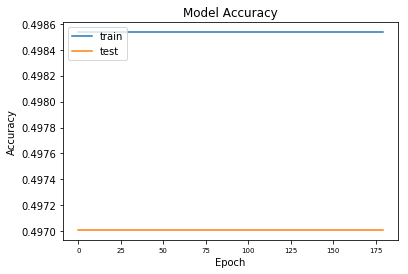

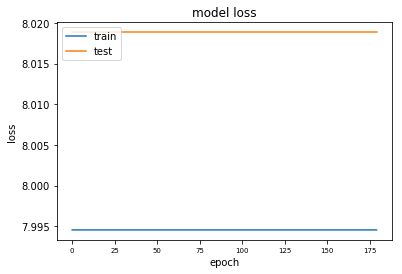

accuracy 50.531086248406744
balanced_accuracy_score 50.0
f1_score 33.56853890300122
precision_score 25.533906774439213
Log loss 17.08635305781712
recall_score 100.0


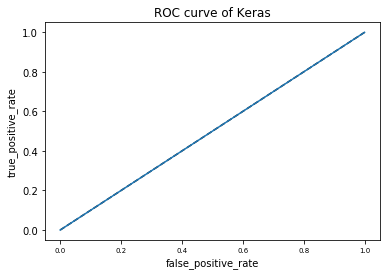

roc_auc_score 50.0
confusion_matrix [[    0 10479]
 [    0 10704]]
classification_report              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10479
           1       0.51      1.00      0.67     10704

   micro avg       0.51      0.51      0.51     21183
   macro avg       0.25      0.50      0.34     21183
weighted avg       0.26      0.51      0.34     21183


 Time taken to execute the Keras is 1039.3409087657928

Dated on2018-12-21 07:39:32.227227



In [23]:
estimator , y_pred = dlModels.dlModel_classifier(X_train, y_train, X_test, y_test)

In [67]:

if not sys.warnoptions:
    warnings.simplefilter("ignore")
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.optimizers import SGD
import tensorflow as tf

### Deep Learning

In [116]:


#~~~~~~~~~~~~~~~~base model~~~~~~~~~~~~~~~~~~~~
def DLmodel_baseline(X_train, y_train, X_test, y_test,loss='binary_crossentropy', 
                     metrics=['accuracy'], 
                     optimizer = tf.train.RMSPropOptimizer(0.001)):
# create model
    model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu,
                       input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)
    model.fit(X_train, y_train, 
               batch_size = 60, 
               epochs = 30, verbose=1)
    return model

In [120]:
import dlModels

In [117]:

# Deep Learning model classifier

def dlModel_classifier(X_train, y_train, X_test, y_test,EPOCHS = 100, batch_size=5,
                        loss='binary_crossentropy', metrics=['accuracy'],
                        optimizer = SGD(lr = 0.01, momentum = 0.9)):
    start_time = time.time()
    estimator = DLmodel_baseline(X_train,y_train, X_test, y_test, loss, metrics, optimizer)
    # Validation: ¶
    # Fit the model
    history = estimator.fit(X_train, y_train, validation_split=0.20, 
                    epochs=180, batch_size=10, verbose=0)

    # list all data in history
    print(history.history.keys())
    #estimator.fit(X_train, y_train, epochs=EPOCHS, validation_split=0.2, verbose=1, batch_size=batch_size) 

    y_pred= estimator.predict_classes(X_test)
    
    # summarizing historical accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    time_end =time.time() - start_time
    

    # Scores
    acc =accuracy_score(y_pred= y_pred, y_true=y_test) * 100
    print('accuracy '+ str(acc))
    print('balanced_accuracy_score '+ str(balanced_accuracy_score(y_pred= y_pred, y_true=y_test) * 100))

    #f1_score
    f1=f1_score(y_pred= y_pred, y_true=y_test, average='macro')  * 100
    print('f1_score ' + str(f1))
    #precision_score
    prec=precision_score(y_pred= y_pred, y_true=y_test, average='weighted')* 100
    print('precision_score ' + str(prec))
    #log_loss
    print('Log loss ' + str(log_loss(y_pred= y_pred, y_true=y_test) ))
    #recall_score
    recall=recall_score(y_pred= y_pred, y_true=y_test)*100
    print('recall_score ' + str( recall))
    #roc_curve
    y_pred_proba = estimator.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true=y_test, y_score=y_pred_proba)

    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate, label="Keras")
    plt.xlabel('false_positive_rate')
    plt.ylabel('true_positive_rate')
    plt.title('ROC curve of ' + "Keras")
    plt.show()

    #roc_auc_score
    roc= roc_auc_score(y_test,y_pred_proba) * 100
    print('roc_auc_score ' + str(roc))

    #confusion_matrix
    print('confusion_matrix ' + str(confusion_matrix(y_test,y_pred)))

    class_report= classification_report(y_test,y_pred)
    print("classification_report"+ str(class_report))
    f = open(mlresult_dir +str(project_identifier) +"_log_dlModels.csv","a")

    f.write("\n Time taken to execute the Keras is "+
            str(time_end) + "\n" +"Dated on"+ str(datetime.datetime.now()) +"\n" +
            ' Accuracy Score'+ str(acc) +"\n"+'f1_score ' + str(f1)+ "\n"+'precision_score ' + 
            str(prec)+"\n"+ 'recall_score ' + str( recall) +"\n"+'roc_auc_score ' + str(roc)+"\n" +
            'classification_report '+ str(class_report))
    f.close()
    print("\n Time taken to execute the Keras is " + str(time_end))

    print("\n" +"Dated on"+ str(datetime.datetime.now())+ "\n")
    # resturn model object

    return estimator , y_pred

Epoch 1/30
63549/63549 [==============================] - ETA: 3:06 - loss: 6.3770 - acc: 0.600 - ETA: 8s - loss: 7.6960 - acc: 0.5173  - ETA: 4s - loss: 7.9162 - acc: 0.503 - ETA: 3s - loss: 7.9622 - acc: 0.500 - ETA: 2s - loss: 7.9845 - acc: 0.499 - ETA: 2s - loss: 7.9659 - acc: 0.500 - ETA: 2s - loss: 7.9697 - acc: 0.500 - ETA: 2s - loss: 7.9674 - acc: 0.500 - ETA: 1s - loss: 7.9547 - acc: 0.501 - ETA: 1s - loss: 7.9634 - acc: 0.500 - ETA: 1s - loss: 7.9556 - acc: 0.501 - ETA: 1s - loss: 7.9680 - acc: 0.500 - ETA: 1s - loss: 7.9540 - acc: 0.501 - ETA: 1s - loss: 7.9362 - acc: 0.502 - ETA: 1s - loss: 7.9298 - acc: 0.502 - ETA: 1s - loss: 7.9321 - acc: 0.502 - ETA: 1s - loss: 7.9278 - acc: 0.502 - ETA: 1s - loss: 7.9193 - acc: 0.503 - ETA: 0s - loss: 7.9270 - acc: 0.502 - ETA: 0s - loss: 7.9445 - acc: 0.501 - ETA: 0s - loss: 7.9538 - acc: 0.501 - ETA: 0s - loss: 7.9531 - acc: 0.501 - ETA: 0s - loss: 7.9723 - acc: 0.499 - ETA: 0s - loss: 7.9762 - acc: 0.499 - ETA: 0s - loss: 7.9685 - a

63549/63549 [==============================] - ETA: 4s - loss: 7.1741 - acc: 0.550 - ETA: 1s - loss: 7.6117 - acc: 0.522 - ETA: 1s - loss: 7.9470 - acc: 0.501 - ETA: 1s - loss: 8.0517 - acc: 0.494 - ETA: 1s - loss: 8.0316 - acc: 0.496 - ETA: 1s - loss: 8.0839 - acc: 0.492 - ETA: 1s - loss: 8.0812 - acc: 0.493 - ETA: 1s - loss: 8.1098 - acc: 0.491 - ETA: 1s - loss: 8.0864 - acc: 0.492 - ETA: 1s - loss: 8.0833 - acc: 0.493 - ETA: 1s - loss: 8.0721 - acc: 0.493 - ETA: 1s - loss: 8.0698 - acc: 0.493 - ETA: 1s - loss: 8.0546 - acc: 0.494 - ETA: 1s - loss: 8.0193 - acc: 0.497 - ETA: 0s - loss: 8.0163 - acc: 0.497 - ETA: 0s - loss: 7.9986 - acc: 0.498 - ETA: 0s - loss: 7.9978 - acc: 0.498 - ETA: 0s - loss: 7.9942 - acc: 0.498 - ETA: 0s - loss: 7.9815 - acc: 0.499 - ETA: 0s - loss: 7.9752 - acc: 0.499 - ETA: 0s - loss: 7.9725 - acc: 0.499 - ETA: 0s - loss: 7.9845 - acc: 0.499 - ETA: 0s - loss: 7.9816 - acc: 0.499 - ETA: 0s - loss: 7.9893 - acc: 0.498 - ETA: 0s - loss: 7.9815 - acc: 0.499 - ETA

Epoch 17/30
63549/63549 [==============================] - ETA: 4s - loss: 8.5026 - acc: 0.466 - ETA: 1s - loss: 8.1242 - acc: 0.490 - ETA: 1s - loss: 8.0879 - acc: 0.492 - ETA: 1s - loss: 7.9739 - acc: 0.499 - ETA: 1s - loss: 8.0265 - acc: 0.496 - ETA: 1s - loss: 8.0048 - acc: 0.497 - ETA: 1s - loss: 8.0131 - acc: 0.497 - ETA: 1s - loss: 8.0177 - acc: 0.497 - ETA: 1s - loss: 8.0222 - acc: 0.496 - ETA: 1s - loss: 8.0182 - acc: 0.497 - ETA: 1s - loss: 8.0273 - acc: 0.496 - ETA: 1s - loss: 8.0056 - acc: 0.497 - ETA: 1s - loss: 8.0130 - acc: 0.497 - ETA: 1s - loss: 8.0274 - acc: 0.496 - ETA: 0s - loss: 8.0261 - acc: 0.496 - ETA: 0s - loss: 8.0082 - acc: 0.497 - ETA: 0s - loss: 7.9927 - acc: 0.498 - ETA: 0s - loss: 7.9811 - acc: 0.499 - ETA: 0s - loss: 7.9823 - acc: 0.499 - ETA: 0s - loss: 7.9835 - acc: 0.499 - ETA: 0s - loss: 7.9708 - acc: 0.500 - ETA: 0s - loss: 7.9834 - acc: 0.499 - ETA: 0s - loss: 7.9821 - acc: 0.499 - ETA: 0s - loss: 7.9798 - acc: 0.499 - ETA: 0s - loss: 7.9781 - acc:

63549/63549 [==============================] - ETA: 4s - loss: 7.1741 - acc: 0.550 - ETA: 1s - loss: 7.7434 - acc: 0.514 - ETA: 1s - loss: 7.8287 - acc: 0.508 - ETA: 1s - loss: 7.9273 - acc: 0.502 - ETA: 1s - loss: 8.0313 - acc: 0.496 - ETA: 1s - loss: 8.0567 - acc: 0.494 - ETA: 1s - loss: 8.0129 - acc: 0.497 - ETA: 1s - loss: 7.9824 - acc: 0.499 - ETA: 1s - loss: 7.9504 - acc: 0.501 - ETA: 1s - loss: 7.9580 - acc: 0.500 - ETA: 1s - loss: 7.9481 - acc: 0.501 - ETA: 1s - loss: 7.9320 - acc: 0.502 - ETA: 1s - loss: 7.9305 - acc: 0.502 - ETA: 0s - loss: 7.9398 - acc: 0.502 - ETA: 0s - loss: 7.9233 - acc: 0.503 - ETA: 0s - loss: 7.9472 - acc: 0.501 - ETA: 0s - loss: 7.9473 - acc: 0.501 - ETA: 0s - loss: 7.9558 - acc: 0.501 - ETA: 0s - loss: 7.9554 - acc: 0.501 - ETA: 0s - loss: 7.9662 - acc: 0.500 - ETA: 0s - loss: 7.9704 - acc: 0.500 - ETA: 0s - loss: 7.9768 - acc: 0.499 - ETA: 0s - loss: 7.9812 - acc: 0.499 - ETA: 0s - loss: 7.9664 - acc: 0.500 - ETA: 0s - loss: 7.9705 - acc: 0.500 - ETA

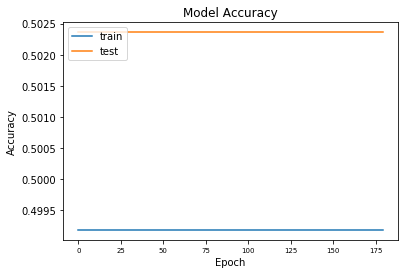

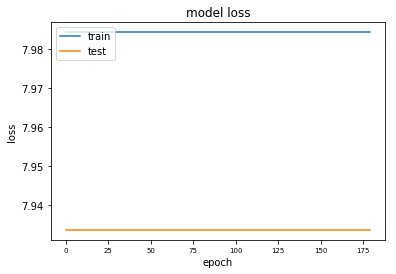

accuracy 50.0542888165038
balanced_accuracy_score 50.0
f1_score 33.35745296671491
precision_score 25.05431828925977
Log loss 17.251036869138765
recall_score 100.0


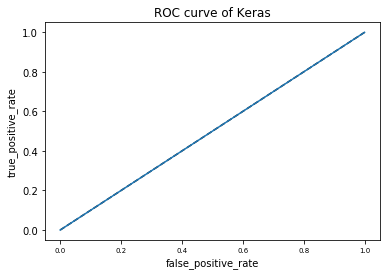

roc_auc_score 50.0
confusion_matrix [[    0 10580]
 [    0 10603]]
classification_report              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10580
           1       0.50      1.00      0.67     10603

   micro avg       0.50      0.50      0.50     21183
   macro avg       0.25      0.50      0.33     21183
weighted avg       0.25      0.50      0.33     21183


 Time taken to execute the Keras is 1059.7932167053223

Dated on2018-12-21 06:48:55.791853



In [119]:
estimator , y_pred = dlModel_classifier(X_train, y_train, X_test, y_test)

In [53]:
estimator.get_config()

[{'class_name': 'Dense',
  'config': {'name': 'dense_1',
   'trainable': True,
   'batch_input_shape': (None, 257),
   'dtype': 'float32',
   'units': 64,
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}},
 {'class_name': 'Dense',
  'config': {'name': 'dense_2',
   'trainable': True,
   'units': 64,
   'activation': 'relu',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'scale': 1.0,
     'mode': 'fan_avg',
     'distribution': 'uniform',
     'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer


### Plot Decision Tree

In [75]:
X_h5.columns.tolist()

['active_brand',
 'association_type',
 'last_sales_dealer_markettype',
 'marital_status',
 'marital_status_confidence',
 'i1_education_confidence',
 'home_ownership',
 'presence_of_children',
 'creditcard_cd',
 'gndr_cd',
 'interest_in_fitness_cd',
 'interest_in_outdoors_cd',
 'interest_in_sports_cd',
 'interest_in_golf_cd',
 'tennis_cd',
 'interest_in_skiing_cd',
 'interest_in_cultural_arts_cd',
 'cruise_enthusiasts_cd',
 'interest_in_music_cd',
 'musical_class_opera_big_bnd_cd',
 'music_country_cd',
 'music_christian_cd',
 'music_oldies_cd',
 'music_rock_cd',
 'photography_cd',
 'interest_in_travel_cd',
 'dwelling_type',
 'aged_parent_in_hh',
 'home_business_ind',
 'i1_business_owner_flg',
 'presence_of_automobile_cd',
 'healthy_living_cd',
 'investors_cd',
 'invest_in_mutual_fund_annts_cd',
 'last_serviced_dealer_markettype',
 'pma_toy_scion_dealership_markettype',
 'pma_lexus_dealership_markettype',
 'owned_lexus_sedan_ind',
 'owned_lexus_LUV_ind',
 'owned_lexus_new_luv_ind',
 'own